Notebook de code - Projet 7 - David Depouez

### 1. Généralités

In [1]:
useKaggle = True

targetName = 'SiteEnergyUse(kBtu)'

In [2]:
if useKaggle == False:
    from IPython.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

Importation des modules et lecture du fichier de données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
import sys
import sklearn
import matplotlib
def get_modules_versions():
    print("python",sys.version)
    print("panda",pd.__version__)
    print("numpy",np.__version__)
    print("matplotlib",matplotlib.__version__)
    print("sklearn {}\n".format(sklearn.__version__))
    
get_modules_versions()

python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
panda 2.0.3
numpy 1.23.5
matplotlib 3.7.2
sklearn 1.2.2



In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
if useKaggle == True:
    ! pip install imodels

from imodels import FIGSRegressor, FIGSRegressorCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.5/220.5 kB 6.9 MB/s eta 0:00:00


In [7]:
if useKaggle == True:
    path = "/kaggle/input/cleaned-2016-building-energy-benchmarking/"
else:
    path = "./data/cleaned/"

filename = "Cleaned-2016_Building_Energy_Benchmarking.csv"    
    
df = pd.read_csv(path+filename)
df.shape

(1650, 46)

### 2. Exploration des Données

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YearBuilt                    1650 non-null   float64
 1   NumberofBuildings            1650 non-null   float64
 2   NumberofFloors               1650 non-null   float64
 3   PropertyGFATotal             1650 non-null   float64
 4   ENERGYSTARScore              1650 non-null   float64
 5   SourceEUI(kBtu/sf)           1650 non-null   float64
 6   SiteEnergyUse(kBtu)          1650 non-null   float64
 7   SteamUse(kBtu)               1650 non-null   float64
 8   Electricity(kBtu)            1650 non-null   float64
 9   NaturalGas(kBtu)             1650 non-null   float64
 10  TotalGHGEmissions            1650 non-null   float64
 11  BALLARD                      1650 non-null   float64
 12  CENTRAL                      1650 non-null   float64
 13  DELRIDGE          

In [9]:
def getCompCols(df,cols):
    ### Get complements colons of cols for a dataframe df ###
    ComplementCols =  [name for i,name in enumerate(df.columns) if name not in cols]
    return ComplementCols


On enlève certaines variables

In [10]:
colsToKeep = ['YearBuilt',   'NumberofBuildings',   'NumberofFloors', 'PropertyGFATotal','ENERGYSTARScore',
              'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)',
              'NaturalGas(kBtu)']
colsToThrow = getCompCols(df,colsToKeep)
colsToThrow
df = df.drop(colsToThrow,axis=1)

In [11]:
df.head()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0     1927.0                1.0            12.0           88434.0   
1     1996.0                1.0            11.0          103566.0   
2     1969.0                1.0            41.0          956110.0   
3     1926.0                1.0            10.0           61320.0   
4     1980.0                1.0            18.0          175580.0   

   ENERGYSTARScore  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0             60.0          182.500000         7.226362e+06       14.510597   
1             61.0          176.100006         8.387933e+06       -2.302585   
2             43.0          241.899994         1.551976e+07       16.886654   
3             56.0          216.199997         6.794584e+06       14.610513   
4             75.0          211.399994         1.417261e+07       -2.302585   

   Electricity(kBtu)  NaturalGas(kBtu)  
0          15.188220         14.059596  
1          14.991963         15.153299  
2          16.227627         14.216834  
3          14.833969         14.409507  
4          15.496079         15.153299

In [12]:
df.describe()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1650.000000        1650.000000     1650.000000      1.650000e+03   
mean   1961.718182           1.170303        4.141818      1.185475e+05   
std      32.795246           2.945548        6.594134      2.972500e+05   
min    1900.000000           0.000000        0.000000      1.128500e+04   
25%    1930.000000           1.000000        1.000000      2.938300e+04   
50%    1965.000000           1.000000        2.000000      4.898850e+04   
75%    1989.000000           1.000000        4.000000      1.050902e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       ENERGYSTARScore  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
count      1650.000000         1650.000000         1.650000e+03   
mean         65.218061          157.431053         4.906448e+06   
std          24.964294          105.903702         4.994056e+06   
min           1.000000            0.000000         1.680890e+04   
25%          50.650000           78.075001         1.257219e+06   
50%          70.000000          131.650002         2.593203e+06   
75%          85.000000          204.824997         6.961781e+06   
max         100.000000          395.287484         1.551976e+07   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  
count     1650.000000        1650.000000       1650.000000  
mean        -1.137763          14.351243          9.112403  
std          4.295079           1.362569          7.233712  
min         -2.302585          -2.302585         -2.302585  
25%         -2.302585          13.496729         -2.302585  
50%         -2.302585          14.302899         13.132803  
75%         -2.302585          15.404140         14.236006  
max         18.720366          16.227627         15.153299

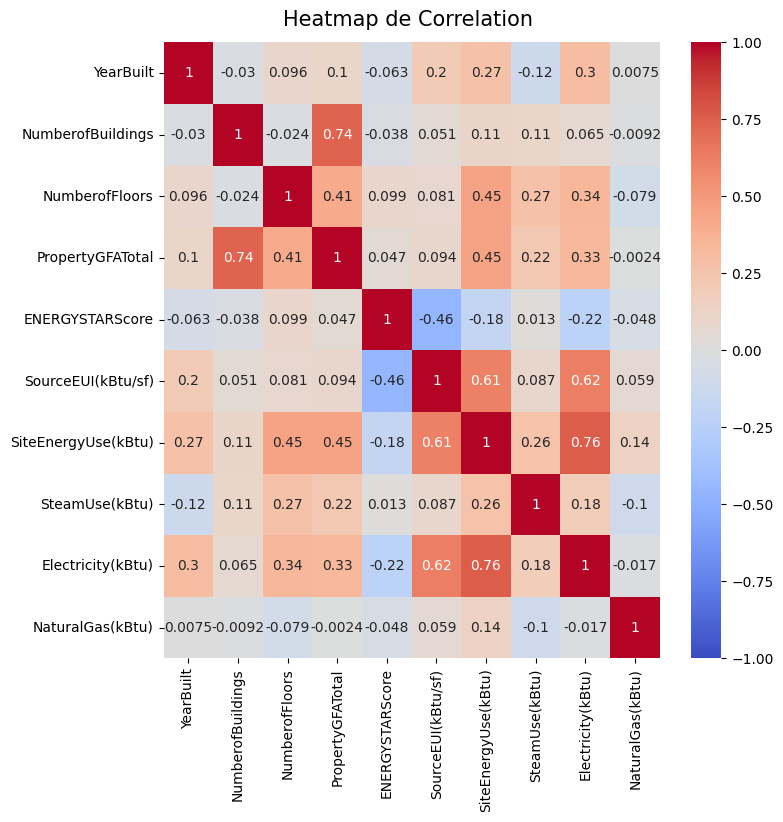

In [13]:
import seaborn as sns
heatmapSize = 8
plt.figure(figsize=(heatmapSize,heatmapSize))


heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='coolwarm');
heatmap.set_title('Heatmap de Correlation ', fontdict={'fontsize':15}, pad=12);

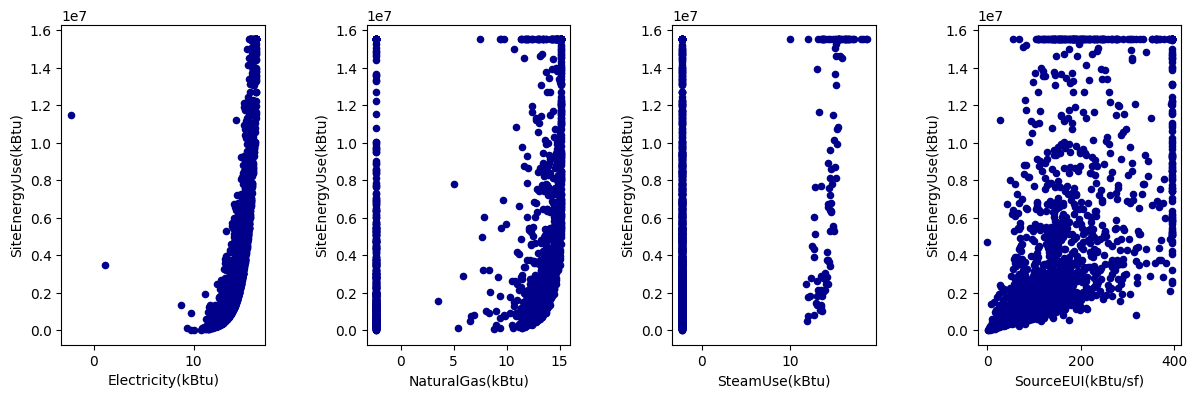

In [14]:
plt.figure(figsize = (14,4))
#pl.suptitle("Représentation du taux d'énergie pour 100g en fonction des autres variables")
ax1 = plt.subplot(1,4,1)
df.plot.scatter(x='Electricity(kBtu)', y=targetName, c='DarkBlue', ax=ax1)
#pl.ylabel(None)
ax2 = plt.subplot(1,4,2)
df.plot.scatter(x='NaturalGas(kBtu)', y=targetName, c='DarkBlue', ax=ax2)
#pl.ylabel(None)
ax3 = plt.subplot(1,4,3)
df.plot.scatter(x='SteamUse(kBtu)', y=targetName, c='DarkBlue', ax=ax3)
#pl.ylabel(None)
ax4 = plt.subplot(1,4,4)
df.plot.scatter(x='SourceEUI(kBtu/sf)', y=targetName, c='DarkBlue', ax=ax4)
#pl.ylabel(None)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.2)
plt.show()

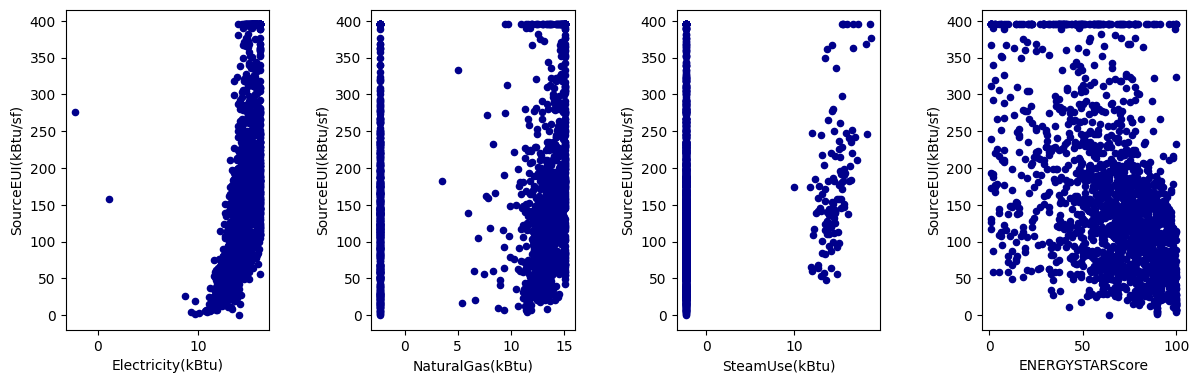

In [15]:
plt.figure(figsize = (14,4))
#pl.suptitle("Représentation du taux d'énergie pour 100g en fonction des autres variables")
ax1 = plt.subplot(1,4,1)
df.plot.scatter(x='Electricity(kBtu)', y='SourceEUI(kBtu/sf)', c='DarkBlue', ax=ax1)
#pl.ylabel(None)
ax2 = plt.subplot(1,4,2)
df.plot.scatter(x='NaturalGas(kBtu)', y='SourceEUI(kBtu/sf)', c='DarkBlue', ax=ax2)
#pl.ylabel(None)
ax3 = plt.subplot(1,4,3)
df.plot.scatter(x='SteamUse(kBtu)', y='SourceEUI(kBtu/sf)', c='DarkBlue', ax=ax3)
#pl.ylabel(None)
ax4 = plt.subplot(1,4,4)
df.plot.scatter(x='ENERGYSTARScore', y='SourceEUI(kBtu/sf)', c='DarkBlue', ax=ax4)
#pl.ylabel(None)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.2)
plt.show()

Séparation du jeu de donnés pour l'apprentissage

In [16]:
from sklearn.model_selection import train_test_split

dfTrain, dfTest = train_test_split(df, train_size=0.8,random_state=42)
dfTrain.shape , dfTest.shape

((1320, 10), (330, 10))

### 3. Modélisations avec l'Energy Star Score

In [17]:
XTrain = dfTrain.drop([targetName],axis=1 )
yTrain = dfTrain[targetName].copy()
XTest = dfTest.drop([targetName],axis=1 )
yTest = dfTest[targetName].copy()

On garde le nom des variables

In [18]:
# list to store results
Results = []
# features names list
colsName = XTrain.columns.tolist()
colsName

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)']

On centre et on met à l'echelle les données

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(XTrain)
xTestScaled = scaler.transform(XTest)

On définit une fonction pour retourner différentes metriques

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

def getRegressionMetrics(ypredict, yreel,isDump = True) :
    ### Compute MSE, RMSE and R2  ###
    MSE = mean_squared_error(yreel, ypredict)
    RMSE = mean_squared_error(yreel, ypredict, squared=False)
    R2 = r2_score(yreel, ypredict)
    if isDump == True :
        print("MSE {:.2f} RMSE {:.2f} R2 {:.3f}".format(MSE,RMSE,R2))
    return (MSE, RMSE, R2)

#### Raw FIGS

In [21]:
# default max_rules=12
rawFigs = FIGSRegressor(random_state=42)

time1 = time.time()
rawFigs.fit(xTrainScaled, yTrain,feature_names=colsName)   # fit model
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 0.0 s


In [22]:
yPredTrain = rawFigs.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rawFigs.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 694361232013.22 RMSE 833283.40 R2 0.972
MSE 984107502808.31 RMSE 992021.93 R2 0.963


In [23]:
print(rawFigs.max_rules, rawFigs.max_trees)

12 None


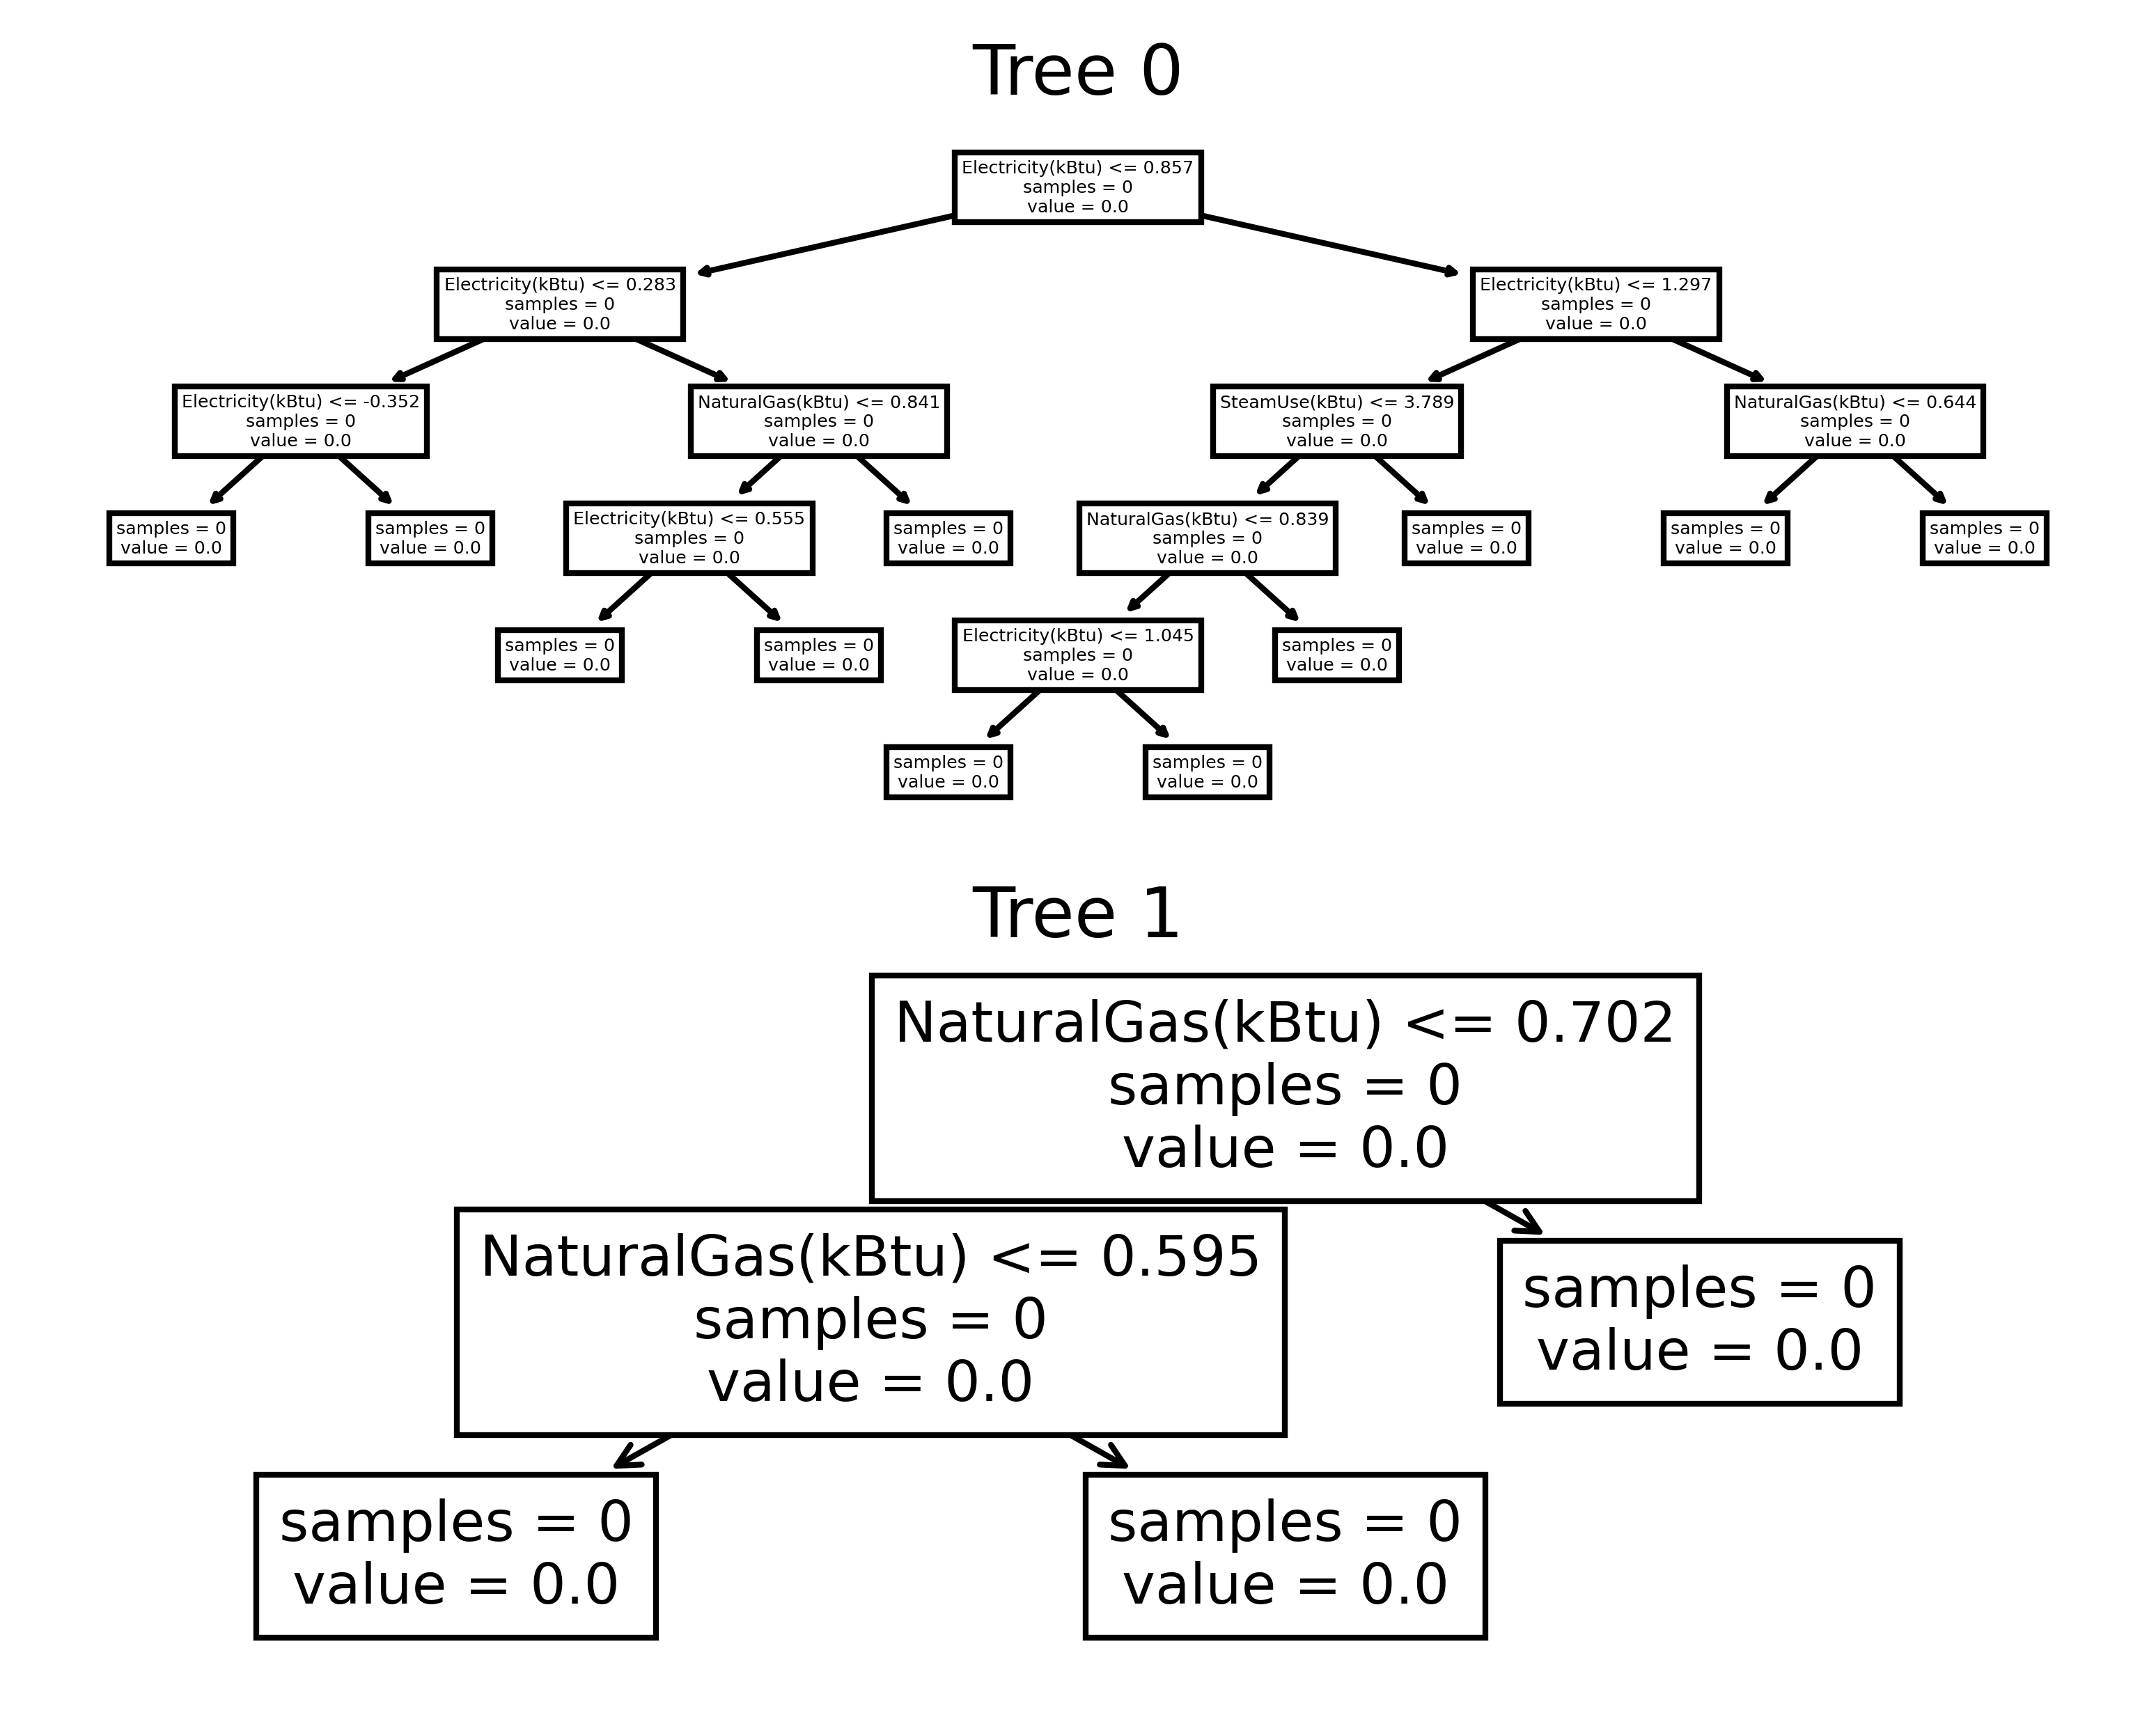

In [24]:
if useKaggle == True:
    rawFigs.plot(feature_names=colsName,dpi=600)
else:    
    print(rawFigs.print_tree(xTrainScaled, yTrain))

In [25]:
# Store errors
Results.append(['Raw FIGS',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### FIGSRegressorCV

In [26]:
figsCV = FIGSRegressorCV (n_rules_list = [6, 12, 24, 30, 50], n_trees_list = [2, 3, 4, 5, 6], cv=5, scoring='r2',random_state=42)

In [27]:
time1 = time.time()
figsCV.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 14.0 s


In [28]:
yPredTrain = figsCV.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = figsCV.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 123782599530.15 RMSE 351827.51 R2 0.995
MSE 815511463999.16 RMSE 903056.73 R2 0.969


In [29]:
bestMaxRules = figsCV.max_rules
print(figsCV.max_rules, figsCV.max_trees)

50 6


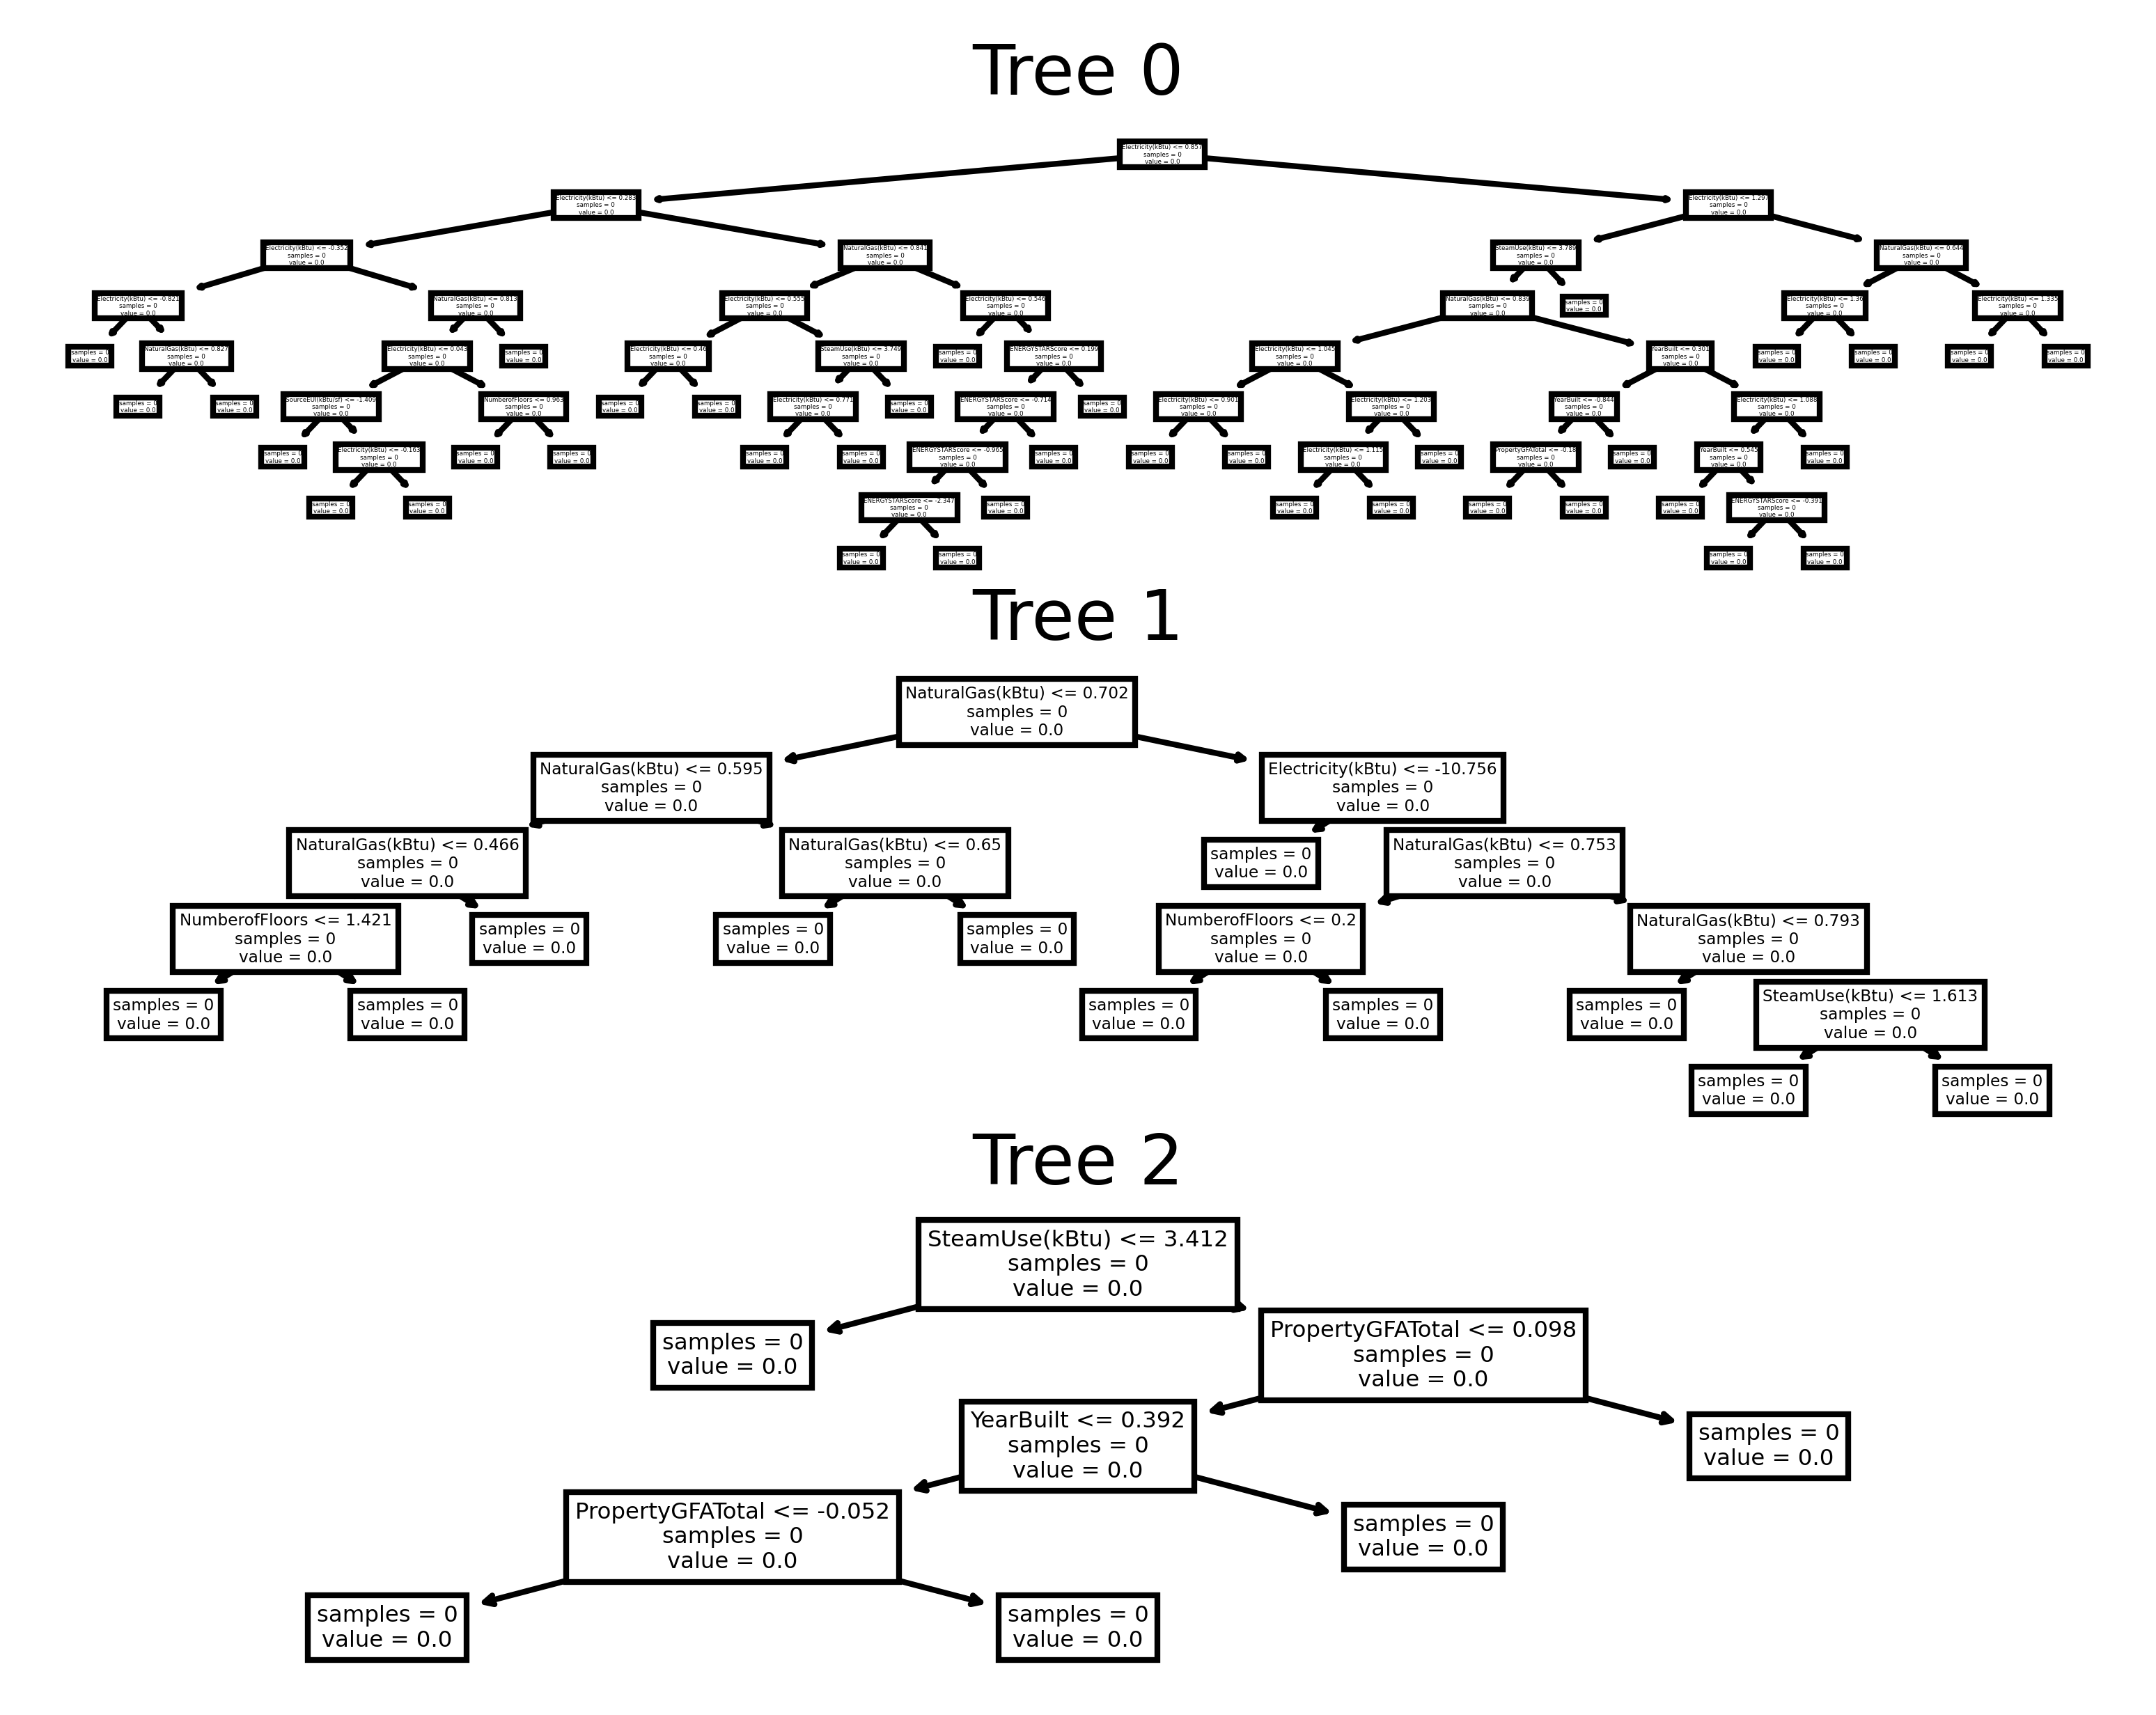

In [30]:
if useKaggle == True:
    figsCV.figs.plot(feature_names=colsName,dpi=600)
else:    
    print(figsCV.figs.print_tree(xTrainScaled, yTrain,feature_names=colsName))

In [31]:
# Store errors
Results.append(['FIGS CV',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Raw Decision Tree

In [32]:
rawDtr = DecisionTreeRegressor(random_state=42,max_depth=4)

time1 = time.time()
rawDtr.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 0.0 s


In [33]:
yPredTrain = rawDtr.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rawDtr.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 742319029622.75 RMSE 861579.38 R2 0.970
MSE 1289720294426.56 RMSE 1135658.53 R2 0.952


In [34]:
from sklearn import tree
fig = plt.figure(figsize=(25,10),dpi=600)
_ = tree.plot_tree(rawDtr, max_depth=3, feature_names=colsName,
                   rounded=True, filled=True,fontsize=10,impurity=False)


In [35]:
# Store errors
Results.append(['Raw Decision Tree',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Decision Tree (GridSearch version)

In [36]:
fold_number = 5
param_grid={"max_depth" : [3,4,5,6],
                "min_samples_leaf":[2,3,4,5,10],
                "min_samples_split":[10,20,30,40]
               # "max_features":[2,3,4]
               }
                    
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr, param_grid,
              scoring='r2', cv=fold_number)

time1 = time.time()
grid_search.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

print('Best_score', grid_search.best_score_)

Process time 2.0 s
Best_score 0.9738904264819132


In [37]:
grid_search.score(xTrainScaled, yTrain).round(3)

0.986

In [38]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 20}

In [39]:
best_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']

In [40]:
dtr = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,
                                         min_samples_split= best_min_samples_split)

dtr.fit(xTrainScaled, yTrain)
print("Processing time {} s".format(time2))

Processing time 2.0 s


In [41]:
yPredTrain = dtr.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = dtr.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 341391908503.78 RMSE 584287.52 R2 0.986
MSE 984645657636.12 RMSE 992293.13 R2 0.963


In [42]:
# Store errors
Results.append(['Decision Tree CV',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

### Ensemble Learning

#### Baggin FIGS

In [43]:
regressor = FIGSRegressor(random_state=42,max_rules=bestMaxRules)
n_estimators = [100,300,500,1000]

temp = []
time1 = time.time()
for i in n_estimators:
    print("Processing Bagging FIGS with {} iterators".format(i))
    baggingFigs = BaggingRegressor(regressor,n_estimators=i, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

    temp.append(r2Test)

time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

# get best iterator
index = temp.index(max(temp))
bestIteratorsNumber = n_estimators[index]
print(bestIteratorsNumber)

Processing Bagging FIGS with 100 iterators
MSE 95099962566.92 RMSE 308382.82 R2 0.996
MSE 646889877649.27 RMSE 804294.65 R2 0.976
Processing Bagging FIGS with 300 iterators
MSE 93650676805.71 RMSE 306023.98 R2 0.996
MSE 626268248535.11 RMSE 791371.12 R2 0.977
Processing Bagging FIGS with 500 iterators
MSE 94174397614.08 RMSE 306878.47 R2 0.996
MSE 626985612432.90 RMSE 791824.23 R2 0.977
Processing Bagging FIGS with 1000 iterators
MSE 93890490475.94 RMSE 306415.55 R2 0.996
MSE 630545866827.80 RMSE 794069.18 R2 0.976
Process time 1183.0 s
300


In [44]:
# refit if not the last one 
if bestIteratorsNumber != n_estimators[-1]:
    print("Processing Bagging FIGS with {} iterators".format(bestIteratorsNumber))
    baggingFigs = BaggingRegressor(regressor,n_estimators=bestIteratorsNumber, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    #time1 = time.time()
    baggingFigs.fit(xTrainScaled, yTrain)
    #time2 = np.round(time.time() - time1,0)
    #print("Process time {} s".format(time2))
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)


Processing Bagging FIGS with 300 iterators
MSE 93646228470.75 RMSE 306016.71 R2 0.996
MSE 626256117765.57 RMSE 791363.45 R2 0.977


In [45]:
# Store errors
Results.append(['Bagging FIGS',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Bagging Decision Tree

In [46]:
dtr = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf, 
                            min_samples_split= best_min_samples_split)

n_estimators = [100,300,500,1000]

temp = []
time1 = time.time()
for i in n_estimators:
    print("Processing Bagging Decision Tree with {} iterators".format(i))
    baggingFigs = BaggingRegressor(dtr,n_estimators=i, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

    temp.append(r2Test)

time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

# get best iterator
index = temp.index(max(temp))
bestIteratorsNumber = n_estimators[index]
print(bestIteratorsNumber)

Processing Bagging Decision Tree with 100 iterators
MSE 308203625870.82 RMSE 555160.90 R2 0.987
MSE 818881385895.92 RMSE 904920.65 R2 0.969
Processing Bagging Decision Tree with 300 iterators
MSE 308387233945.17 RMSE 555326.24 R2 0.987
MSE 809290655900.45 RMSE 899605.83 R2 0.970
Processing Bagging Decision Tree with 500 iterators
MSE 305136860744.00 RMSE 552391.94 R2 0.988
MSE 804579381062.95 RMSE 896983.49 R2 0.970
Processing Bagging Decision Tree with 1000 iterators
MSE 302797490797.31 RMSE 550270.38 R2 0.988
MSE 800483080533.02 RMSE 894697.20 R2 0.970
Process time 5.0 s
1000


In [47]:
# refit if not the last one 
if bestIteratorsNumber != n_estimators[-1]:
    print("Processing Bagging Decision Tree with {} iterators".format(bestIteratorsNumber))
    baggingFigs = BaggingRegressor(dtr,n_estimators=bestIteratorsNumber, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    #time1 = time.time()
    baggingFigs.fit(xTrainScaled, yTrain)
    #time2 = np.round(time.time() - time1,0)
    #print("Process time {} s".format(time2))
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)


In [48]:
# Store errors
Results.append(['Bagging Decision Tree',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Random Forest

In [49]:
fold_number = 5
param_grid={"max_depth" : [2,4,5],
                "min_samples_leaf":[2,5],
                "min_samples_split":[10,20],
                "n_estimators":[100,300,500]
               }
                    
rfg = RandomForestRegressor()
grid_search = GridSearchCV(rfg, param_grid,
              scoring='r2', cv=fold_number,n_jobs=-1)

time1 = time.time()
grid_search.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

print('Best_score', grid_search.best_score_)

Process time 69.0 s
Best_score 0.9793692147506953


In [50]:
grid_search.score(xTrainScaled, yTrain).round(3)

0.988

In [51]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [52]:
best_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_n_estimators = grid_search.best_params_['n_estimators']

In [53]:
rfg = RandomForestRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,
                                           min_samples_split= best_min_samples_split,
                                          n_estimators = best_n_estimators)

#time1 = time.time()
rfg.fit(xTrainScaled, yTrain)
#time2 = np.round(time.time() - time1,0)
#print("Process time {} s".format(time2))

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [54]:
yPredTrain = rfg.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rfg.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 285486663905.36 RMSE 534309.52 R2 0.988
MSE 811104446019.90 RMSE 900613.37 R2 0.970


In [55]:
# Store errors
Results.append(['Random Forest',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Comparaison des différents algorithmes

In [56]:
dfResults = pd.DataFrame(Results,columns=['Name','MSE Train','RMSE Train','R2 Train','MSE Test','RMSE Test','R2 Test','Temps (s)'])
dfResults.round(3)

Name     MSE Train  RMSE Train  R2 Train      MSE Test  \
0               Raw FIGS  6.943612e+11  833283.404     0.972  9.841075e+11   
1                FIGS CV  1.237826e+11  351827.514     0.995  8.155115e+11   
2      Raw Decision Tree  7.423190e+11  861579.381     0.970  1.289720e+12   
3       Decision Tree CV  3.413919e+11  584287.522     0.986  9.846457e+11   
4           Bagging FIGS  9.364623e+10  306016.713     0.996  6.262561e+11   
5  Bagging Decision Tree  3.027975e+11  550270.380     0.988  8.004831e+11   
6          Random Forest  2.854867e+11  534309.521     0.988  8.111044e+11   

     RMSE Test  R2 Test  Temps (s)  
0   992021.927    0.963        0.0  
1   903056.734    0.969       14.0  
2  1135658.529    0.952        0.0  
3   992293.131    0.963        2.0  
4   791363.455    0.977     1183.0  
5   894697.200    0.970        5.0  
6   900613.372    0.970       69.0

### 4. Modélisations sans l'Energy Star Score

In [57]:
XTrain = dfTrain.drop([targetName,'ENERGYSTARScore'],axis=1 )
yTrain = dfTrain[targetName].copy()
XTest = dfTest.drop([targetName,'ENERGYSTARScore'],axis=1 )
yTest = dfTest[targetName].copy()

on garde le nom des variables

In [58]:
# list to store results
Results = []
# features names list
colsName = XTrain.columns.tolist()
colsName

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)']

On centre et on met à l'echelle les données

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(XTrain)
xTestScaled = scaler.transform(XTest)

On définit une fonction pour retourner différentes metriques

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

def getRegressionMetrics(ypredict, yreel,isDump = True) :
    ### Compute MSE, RMSE and R2  ###
    MSE = mean_squared_error(yreel, ypredict)
    RMSE = mean_squared_error(yreel, ypredict, squared=False)
    R2 = r2_score(yreel, ypredict)
    if isDump == True :
        print("MSE {:.2f} RMSE {:.2f} R2 {:.3f}".format(MSE,RMSE,R2))
    return (MSE, RMSE, R2)

#### Raw FIGS

In [61]:
# default max_rules=12
rawFigs = FIGSRegressor(random_state=42)

time1 = time.time()
rawFigs.fit(xTrainScaled, yTrain,feature_names=colsName)   # fit model
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 0.0 s


In [62]:
yPredTrain = rawFigs.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rawFigs.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 694361232013.22 RMSE 833283.40 R2 0.972
MSE 984107502808.31 RMSE 992021.93 R2 0.963


In [63]:
print(rawFigs.max_rules, rawFigs.max_trees)

12 None


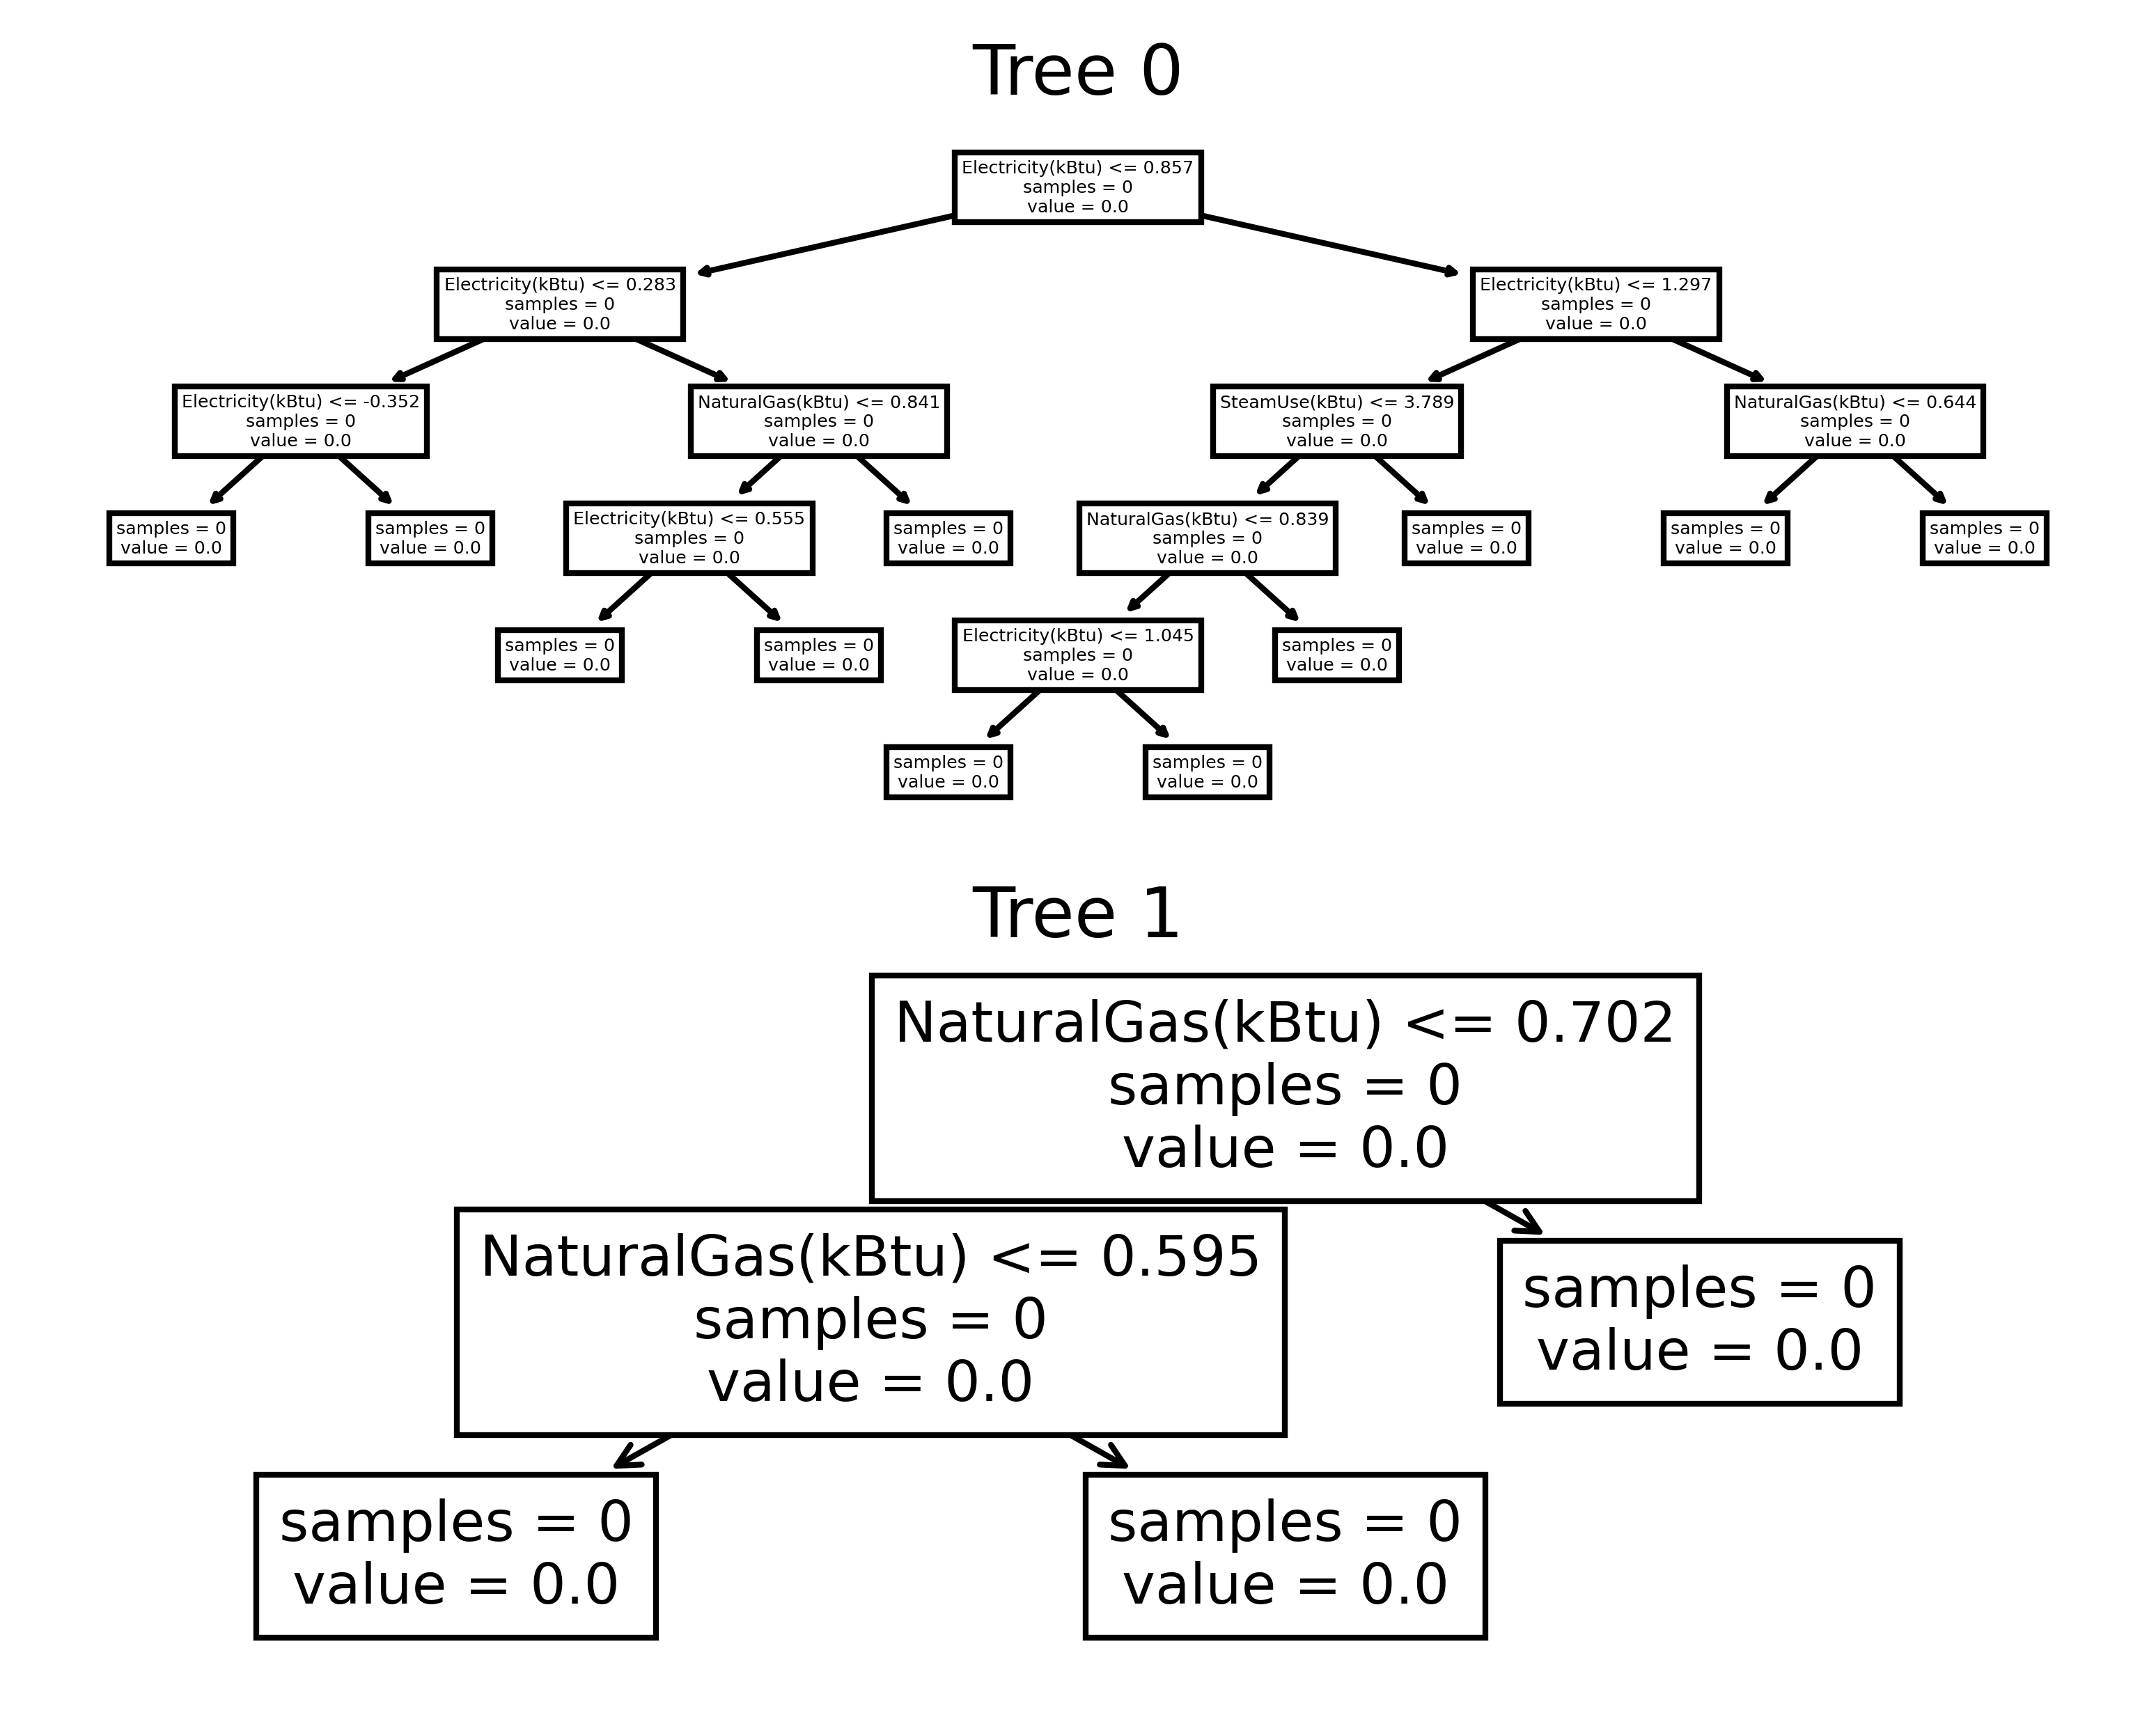

In [64]:
if useKaggle == True:
    rawFigs.plot(feature_names=colsName,dpi=600)
else:    
    print(rawFigs.print_tree(xTrainScaled, yTrain))

In [65]:
# Store errors
Results.append(['Raw FIGS',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### FIGSRegressorCV

In [66]:
figsCV = FIGSRegressorCV (n_rules_list = [6, 12, 24, 30, 50], n_trees_list = [2, 3, 4, 5, 6], cv=5, scoring='r2',random_state=42)

In [67]:
time1 = time.time()
figsCV.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 14.0 s


In [68]:
yPredTrain = figsCV.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = figsCV.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 126829909025.13 RMSE 356131.87 R2 0.995
MSE 770226840741.81 RMSE 877625.68 R2 0.971


In [69]:
bestMaxRules = figsCV.max_rules
print(figsCV.max_rules, figsCV.max_trees)

50 6


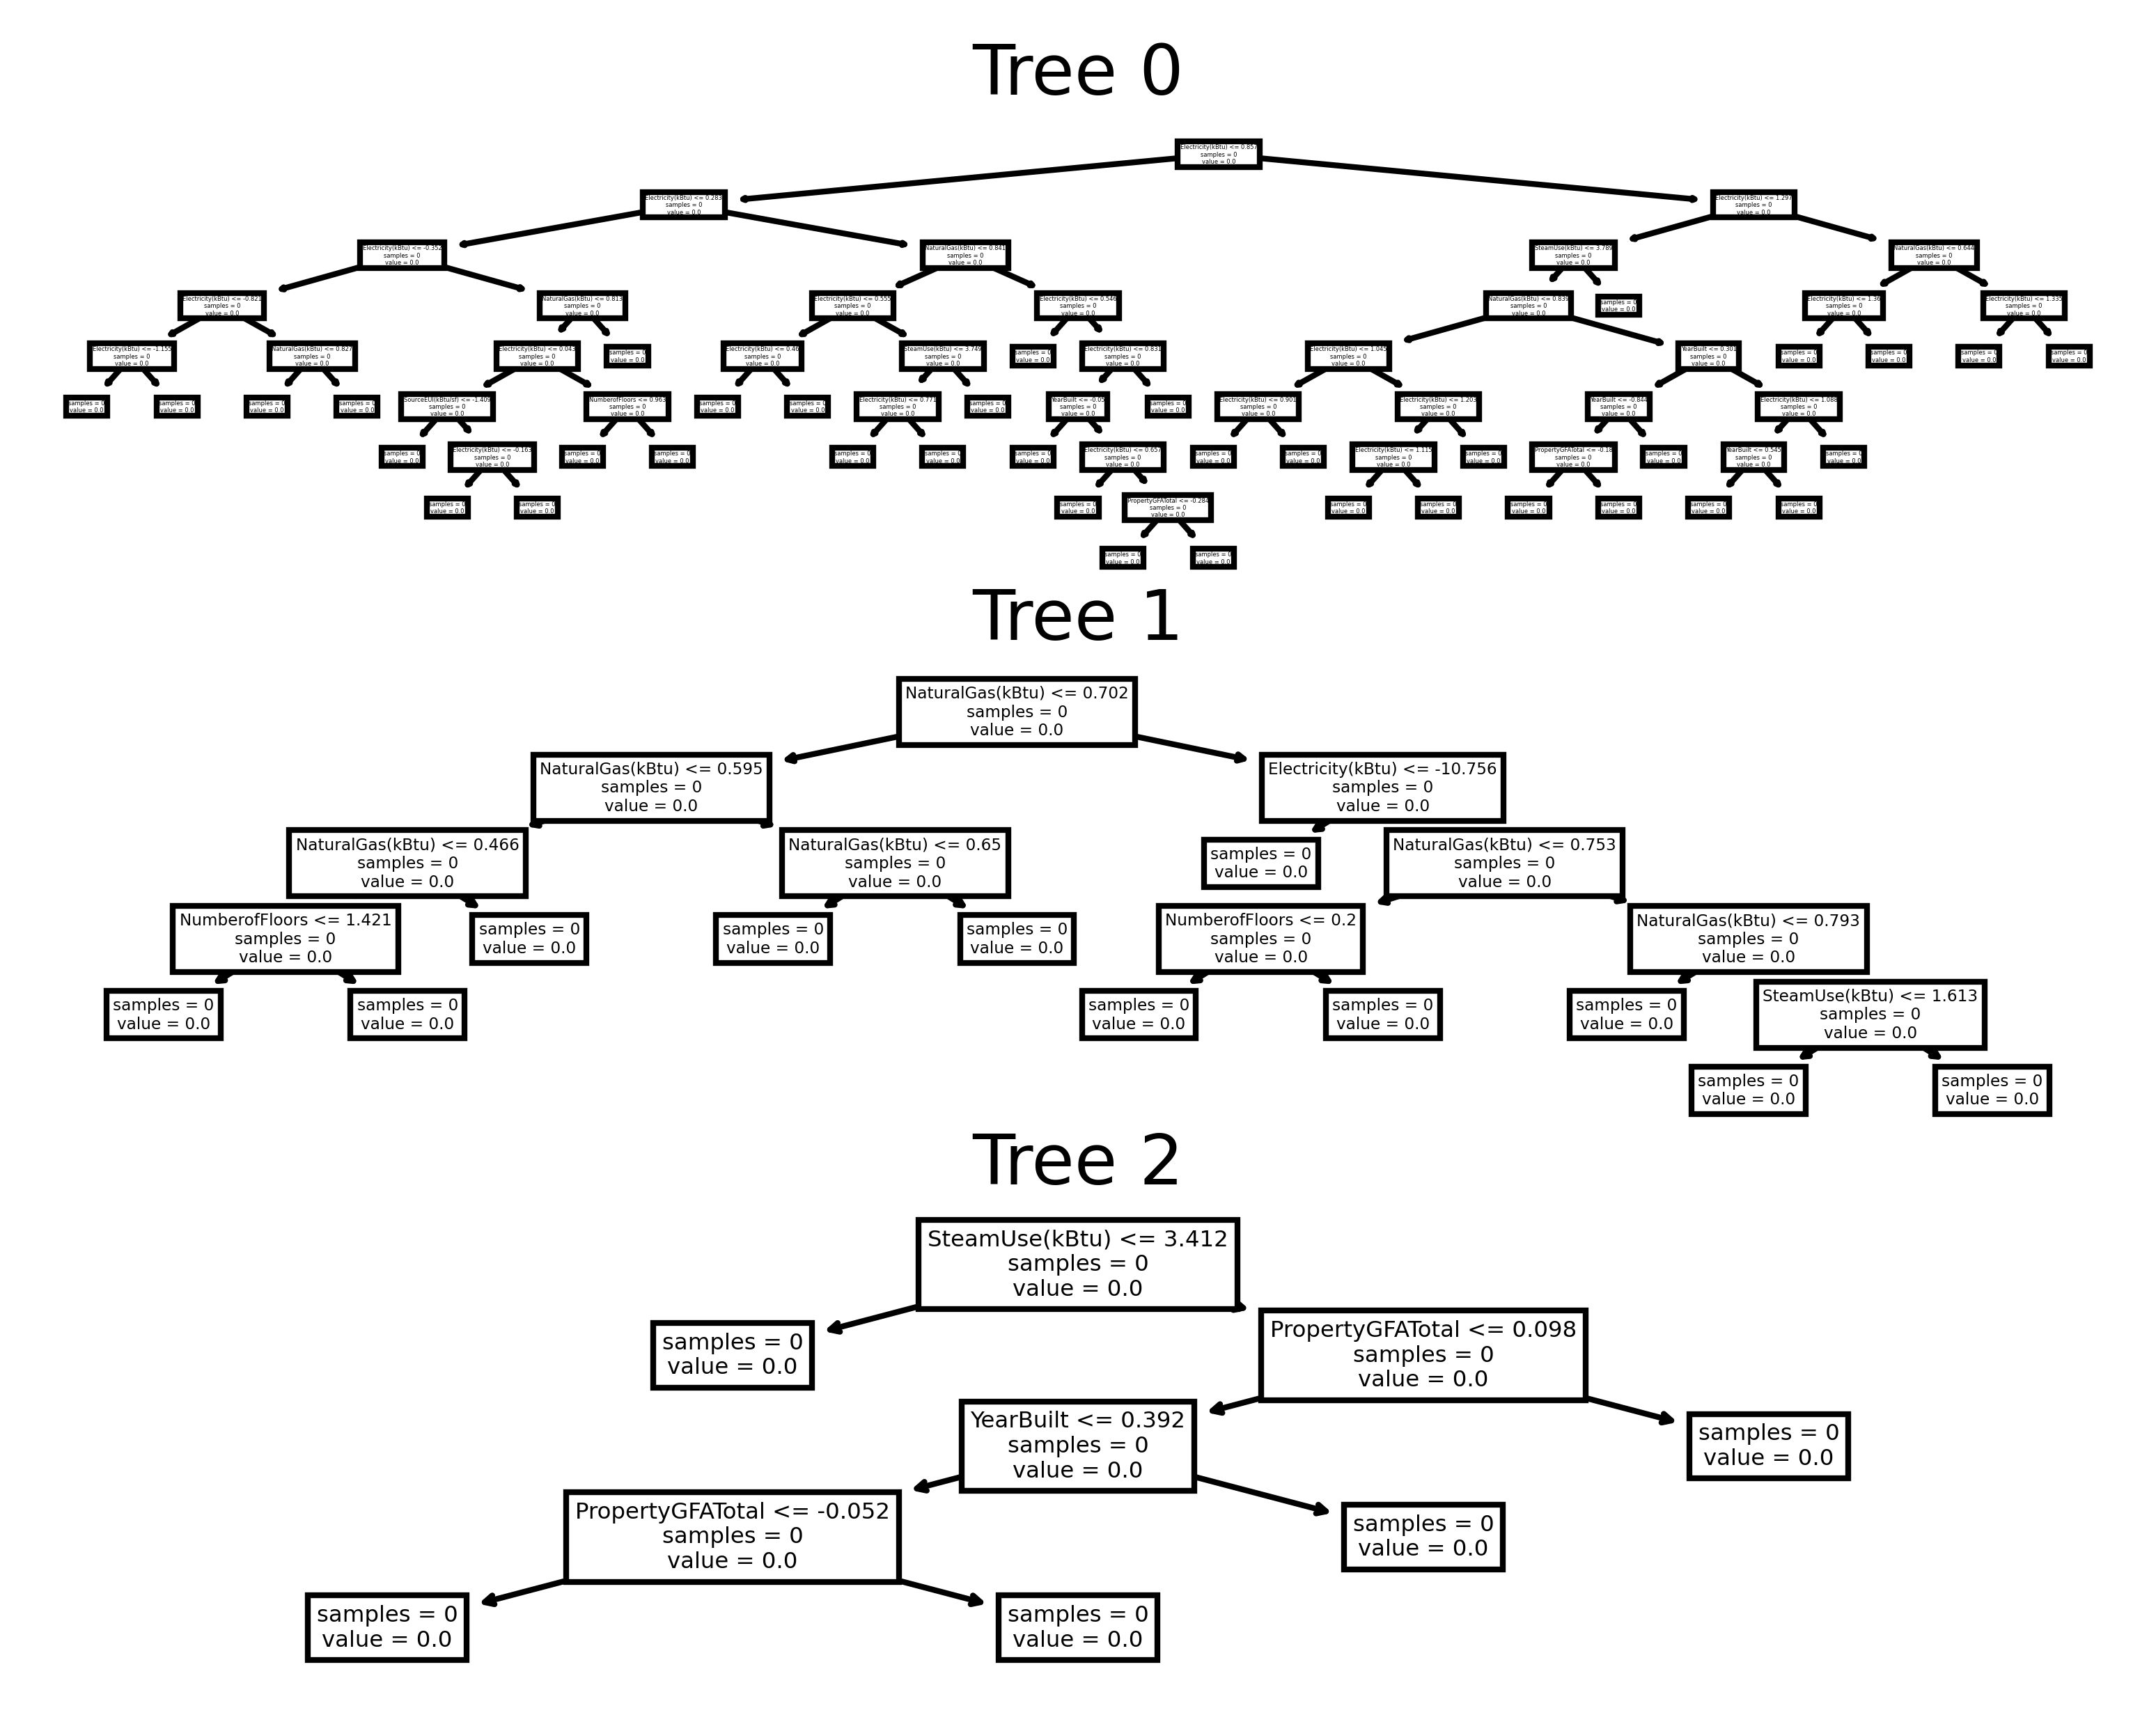

In [70]:
if useKaggle == True:
    figsCV.figs.plot(feature_names=colsName,dpi=600)
else:    
    print(figsCV.figs.print_tree(xTrainScaled, yTrain,feature_names=colsName))

In [71]:
# Store errors
Results.append(['FIGS CV',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Raw Decision Tree

In [72]:
rawDtr = DecisionTreeRegressor(random_state=42,max_depth=4)

time1 = time.time()
rawDtr.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

Process time 0.0 s


In [73]:
yPredTrain = rawDtr.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rawDtr.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 744421241739.51 RMSE 862798.49 R2 0.970
MSE 1292610516274.08 RMSE 1136930.30 R2 0.952


In [74]:
from sklearn import tree
fig = plt.figure(figsize=(25,10),dpi=600)
_ = tree.plot_tree(rawDtr, max_depth=3, feature_names=colsName,
                   rounded=True, filled=True,fontsize=10,impurity=False)


In [75]:
# Store errors
Results.append(['Raw Decision Tree',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Decision Tree (GridSearch version)

In [76]:
fold_number = 5
param_grid={"max_depth" : [3,4,5,6],
                "min_samples_leaf":[2,3,4,5,10],
                "min_samples_split":[10,20,30,40]
               # "max_features":[2,3,4]
               }
                    
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr, param_grid,
              scoring='r2', cv=fold_number)

time1 = time.time()
grid_search.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

print('Best_score', grid_search.best_score_)

Process time 2.0 s
Best_score 0.9746385074786679


In [77]:
grid_search.score(xTrainScaled, yTrain).round(3)

0.988

In [78]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [79]:
best_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']

In [80]:
dtr = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,
                                         min_samples_split= best_min_samples_split)

#time1 = time.time()
dtr.fit(xTrainScaled, yTrain)
#time2 = np.round(time.time() - time1,0)
#print("Processing time {} s".format(time2))

DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=10)

In [81]:
yPredTrain = dtr.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = dtr.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 292989136526.07 RMSE 541284.71 R2 0.988
MSE 949745167025.58 RMSE 974548.70 R2 0.964


In [82]:
# Store errors
Results.append(['Decision Tree CV',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

### Ensemble Learning

#### Baggin FIGS

In [83]:
regressor = FIGSRegressor(random_state=42,max_rules=bestMaxRules)
n_estimators = [100,300,500,1000]

temp = []
time1 = time.time()
for i in n_estimators:
    print("Processing Bagging FIGS with {} iterators".format(i))
    baggingFigs = BaggingRegressor(regressor,n_estimators=i, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

    temp.append(r2Test)

time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))
    
# get best iterator
index = temp.index(max(temp))
bestIteratorsNumber = n_estimators[index]
print(bestIteratorsNumber)

Processing Bagging FIGS with 100 iterators
MSE 93903286657.18 RMSE 306436.43 R2 0.996
MSE 650640830985.27 RMSE 806623.10 R2 0.976
Processing Bagging FIGS with 300 iterators
MSE 94017497095.73 RMSE 306622.73 R2 0.996
MSE 637742528533.51 RMSE 798587.83 R2 0.976
Processing Bagging FIGS with 500 iterators
MSE 94321715986.38 RMSE 307118.41 R2 0.996
MSE 640952988541.86 RMSE 800595.40 R2 0.976
Processing Bagging FIGS with 1000 iterators
MSE 94512649888.10 RMSE 307429.10 R2 0.996
MSE 641639357152.37 RMSE 801023.94 R2 0.976
Process time 1197.0 s
300


In [84]:
# refit if not the last one 
if bestIteratorsNumber != n_estimators[-1]:
    print("Processing Bagging FIGS with {} iterators".format(bestIteratorsNumber))
    baggingFigs = BaggingRegressor(regressor,n_estimators=bestIteratorsNumber, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)


Processing Bagging FIGS with 300 iterators
MSE 94472605886.77 RMSE 307363.96 R2 0.996
MSE 640782578951.52 RMSE 800488.96 R2 0.976


In [85]:
# Store errors
Results.append(['Bagging FIGS',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Bagging Decision Tree

In [86]:
dtr = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf, 
                            min_samples_split= best_min_samples_split)

n_estimators = [100,300,500,1000]

temp = []
time1 = time.time()
for i in n_estimators:
    print("Processing Bagging Decision Tree with {} iterators".format(i))
    baggingFigs = BaggingRegressor(dtr,n_estimators=i, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

    temp.append(r2Test)

time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

# get best iterator
index = temp.index(max(temp))
bestIteratorsNumber = n_estimators[index]
print(bestIteratorsNumber)

Processing Bagging Decision Tree with 100 iterators
MSE 234400123311.59 RMSE 484148.86 R2 0.990
MSE 773969526587.09 RMSE 879755.38 R2 0.971
Processing Bagging Decision Tree with 300 iterators
MSE 234357568939.45 RMSE 484104.92 R2 0.990
MSE 762486692968.59 RMSE 873204.84 R2 0.971
Processing Bagging Decision Tree with 500 iterators
MSE 234052197448.99 RMSE 483789.41 R2 0.990
MSE 760745024991.86 RMSE 872206.99 R2 0.972
Processing Bagging Decision Tree with 1000 iterators
MSE 232783773561.20 RMSE 482476.71 R2 0.990
MSE 760931561613.12 RMSE 872313.91 R2 0.972
Process time 5.0 s
500


In [87]:
# refit if not the last one 
if bestIteratorsNumber != n_estimators[-1]:
    print("Processing Bagging Decision Tree with {} iterators".format(bestIteratorsNumber))
    baggingFigs = BaggingRegressor(dtr,n_estimators=bestIteratorsNumber, max_samples=0.8, random_state=42, bootstrap=True,n_jobs=-1)
    
    baggingFigs.fit(xTrainScaled, yTrain)
    
    yPredTrain = baggingFigs.predict(xTrainScaled)
    yPredTest = baggingFigs.predict(xTestScaled)

    msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
    msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)


Processing Bagging Decision Tree with 500 iterators
MSE 234052197448.99 RMSE 483789.41 R2 0.990
MSE 760745024991.86 RMSE 872206.99 R2 0.972


In [88]:
# Store errors
Results.append(['Bagging Decision Tree',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Random Forest

In [89]:
fold_number = 5
param_grid={"max_depth" : [2,4,5],
                "min_samples_leaf":[2,5],
                "min_samples_split":[10,20],
                "n_estimators":[100,300,500]
               }
                    
rfg = RandomForestRegressor()
grid_search = GridSearchCV(rfg, param_grid,
              scoring='r2', cv=fold_number,n_jobs=-1)

time1 = time.time()
grid_search.fit(xTrainScaled, yTrain)
time2 = np.round(time.time() - time1,0)
print("Process time {} s".format(time2))

print('Best_score', grid_search.best_score_)

Process time 65.0 s
Best_score 0.9796980401795942


In [90]:
grid_search.score(xTrainScaled, yTrain).round(3)

0.988

In [91]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [92]:
best_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_n_estimators = grid_search.best_params_['n_estimators']

In [93]:
rfg = RandomForestRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,
                                           min_samples_split= best_min_samples_split,
                                          n_estimators = best_n_estimators)


rfg.fit(xTrainScaled, yTrain)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [94]:
yPredTrain = rfg.predict(xTrainScaled)
msTrain,rmTrain,r2Train = getRegressionMetrics(yPredTrain, yTrain, isDump=True)
yPredTest = rfg.predict(xTestScaled)
msTest,rmTest,r2Test = getRegressionMetrics(yPredTest, yTest, isDump=True)

MSE 300761397888.14 RMSE 548417.18 R2 0.988
MSE 850281118941.74 RMSE 922106.89 R2 0.968


In [95]:
# Store errors
Results.append(['Random Forest',msTrain,rmTrain,r2Train,msTest,rmTest,r2Test,time2])

#### Comparaison des différents algorithmes

In [96]:
dfResults = pd.DataFrame(Results,columns=['Name','MSE Train','RMSE Train','R2 Train','MSE Test','RMSE Test','R2 Test','Temps (s)'])
dfResults.round(3)

Name     MSE Train  RMSE Train  R2 Train      MSE Test  \
0               Raw FIGS  6.943612e+11  833283.404     0.972  9.841075e+11   
1                FIGS CV  1.268299e+11  356131.870     0.995  7.702268e+11   
2      Raw Decision Tree  7.444212e+11  862798.494     0.970  1.292611e+12   
3       Decision Tree CV  2.929891e+11  541284.709     0.988  9.497452e+11   
4           Bagging FIGS  9.447261e+10  307363.963     0.996  6.407826e+11   
5  Bagging Decision Tree  2.340522e+11  483789.414     0.990  7.607450e+11   
6          Random Forest  3.007614e+11  548417.175     0.988  8.502811e+11   

     RMSE Test  R2 Test  Temps (s)  
0   992021.927    0.963        0.0  
1   877625.684    0.971       14.0  
2  1136930.304    0.952        0.0  
3   974548.699    0.964        2.0  
4   800488.962    0.976     1197.0  
5   872206.985    0.972        5.0  
6   922106.891    0.968       65.0